# Week 8 Assignment Machine Learning Model Building 
## K Nearest Neighbors


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
plt.style.use('fivethirtyeight')
%matplotlib inline


In [3]:
# start with Exploratory Data Analysis (EDA)
churn_dataset = pd.read_csv(r'Churn.csv')

In [4]:
churn_dataset.describe()

,Account length,Area code,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [5]:
print("Dataset shape",churn_dataset.shape)
churn_dataset.head(5)

Dataset shape (667, 16)


,Account length,Area code,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,117,408,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,65,415,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,161,415,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,111,415,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,49,510,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [6]:
churn_dataset.groupby("Area code").size()

Area code
408    169
415    337
510    161
dtype: int64

In [7]:
# Any missing values?
churn_dataset.isnull().any().any()

np.False_

In [8]:
all_feature_columns = ['Account length',
 'Area code',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',]

X = churn_dataset[all_feature_columns].values
y = churn_dataset['Churn'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [10]:
X_train.shape

(533, 15)


# Feature Scaling

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 1.83775641 -0.53502269 -0.10400168 ... -0.63374193  0.09181084
   0.29660469]
 [ 0.06970657 -0.69883113 -0.27362498 ...  1.38167841  1.35222299
   1.79509096]
 [ 0.02059408 -0.69883113  1.77078217 ...  0.57551027  1.72904724
   2.54433409]
 ...
 [ 0.43805029  1.68809185  0.22453187 ... -0.23065786 -1.53243163
  -1.20188157]
 [-1.18266207 -0.53502269  0.19060721 ...  0.57551027  1.41719269
  -0.45263844]
 [ 2.47621886  1.68809185  0.42807983 ...  0.17242621  1.35222299
   1.04584782]]


# Data Visualization

<Axes: >

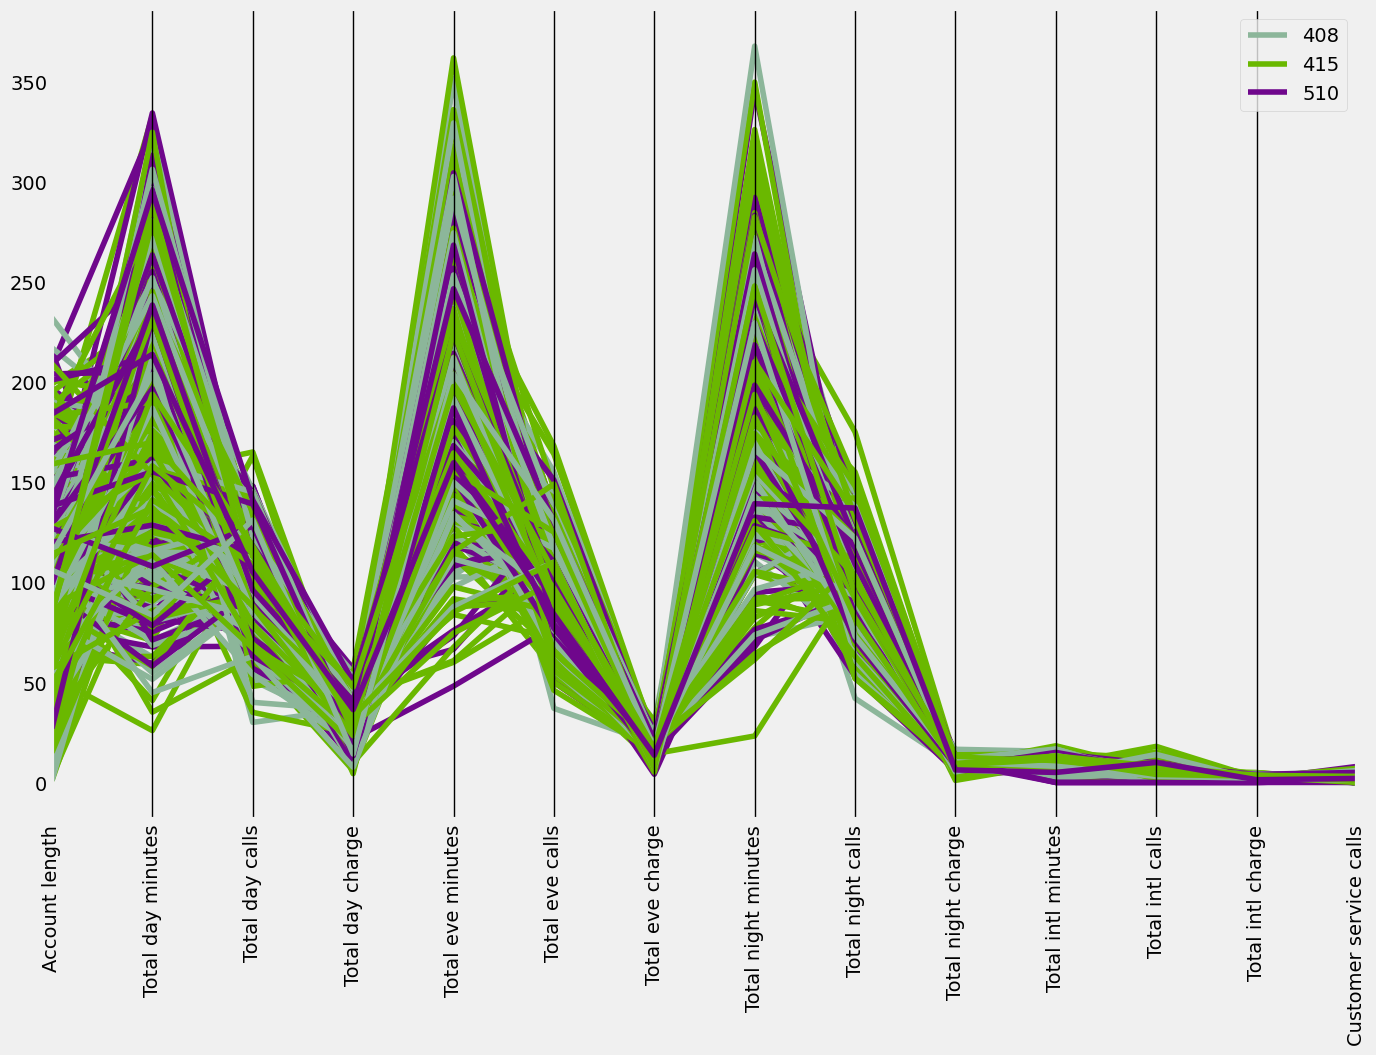

In [13]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
cols_to_plot = ['Account length',
 'Area code',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',]
plt.xticks(rotation=90)
parallel_coordinates(churn_dataset[cols_to_plot], "Area code")

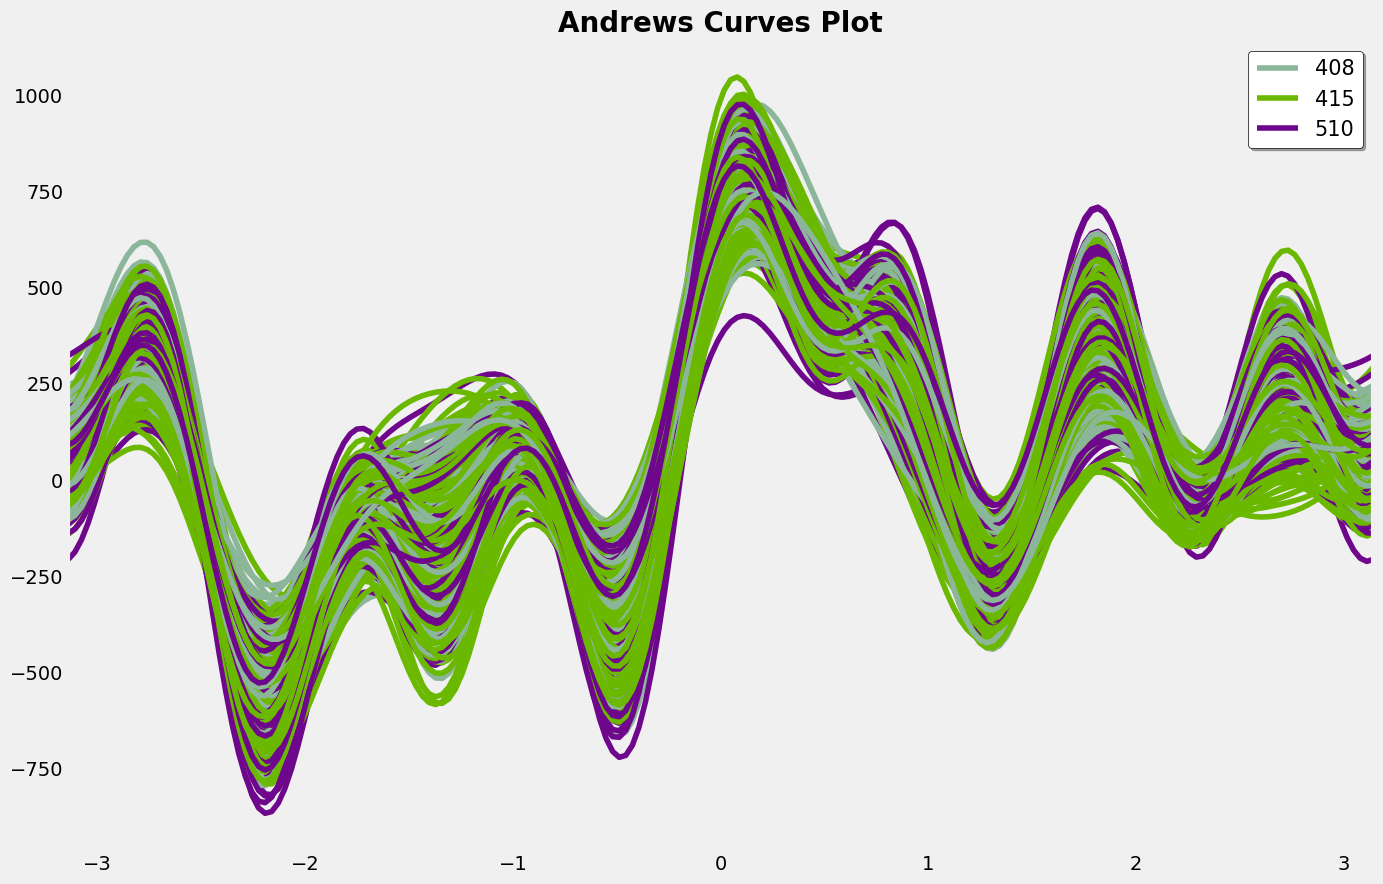

In [14]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(churn_dataset[cols_to_plot], "Area code")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 640x480 with 0 Axes>

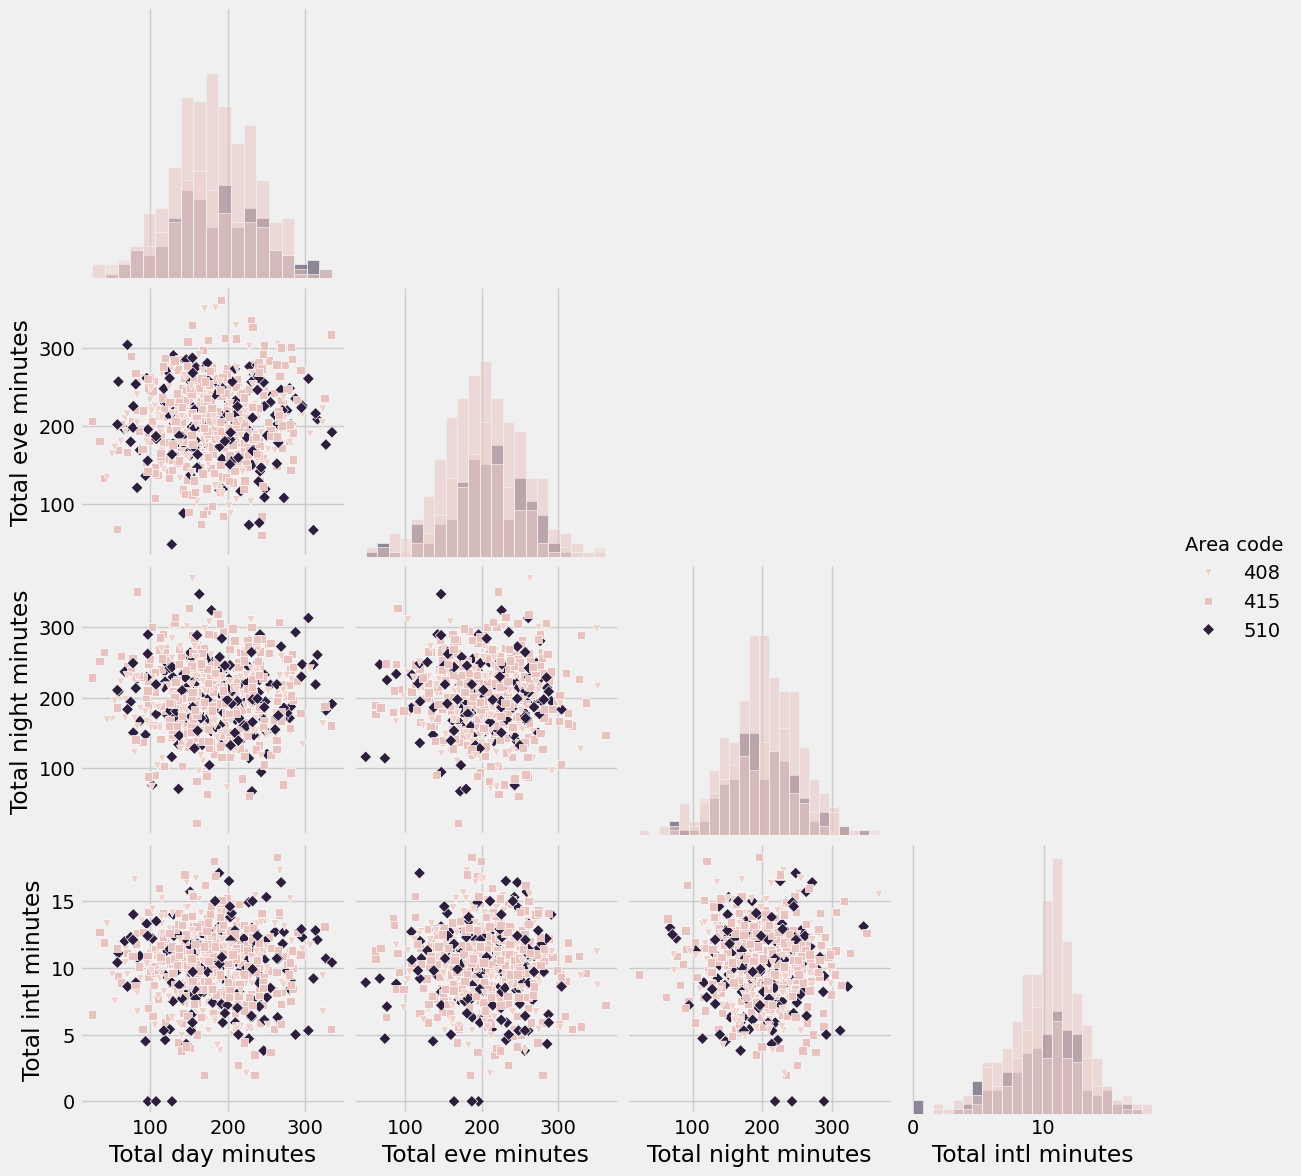

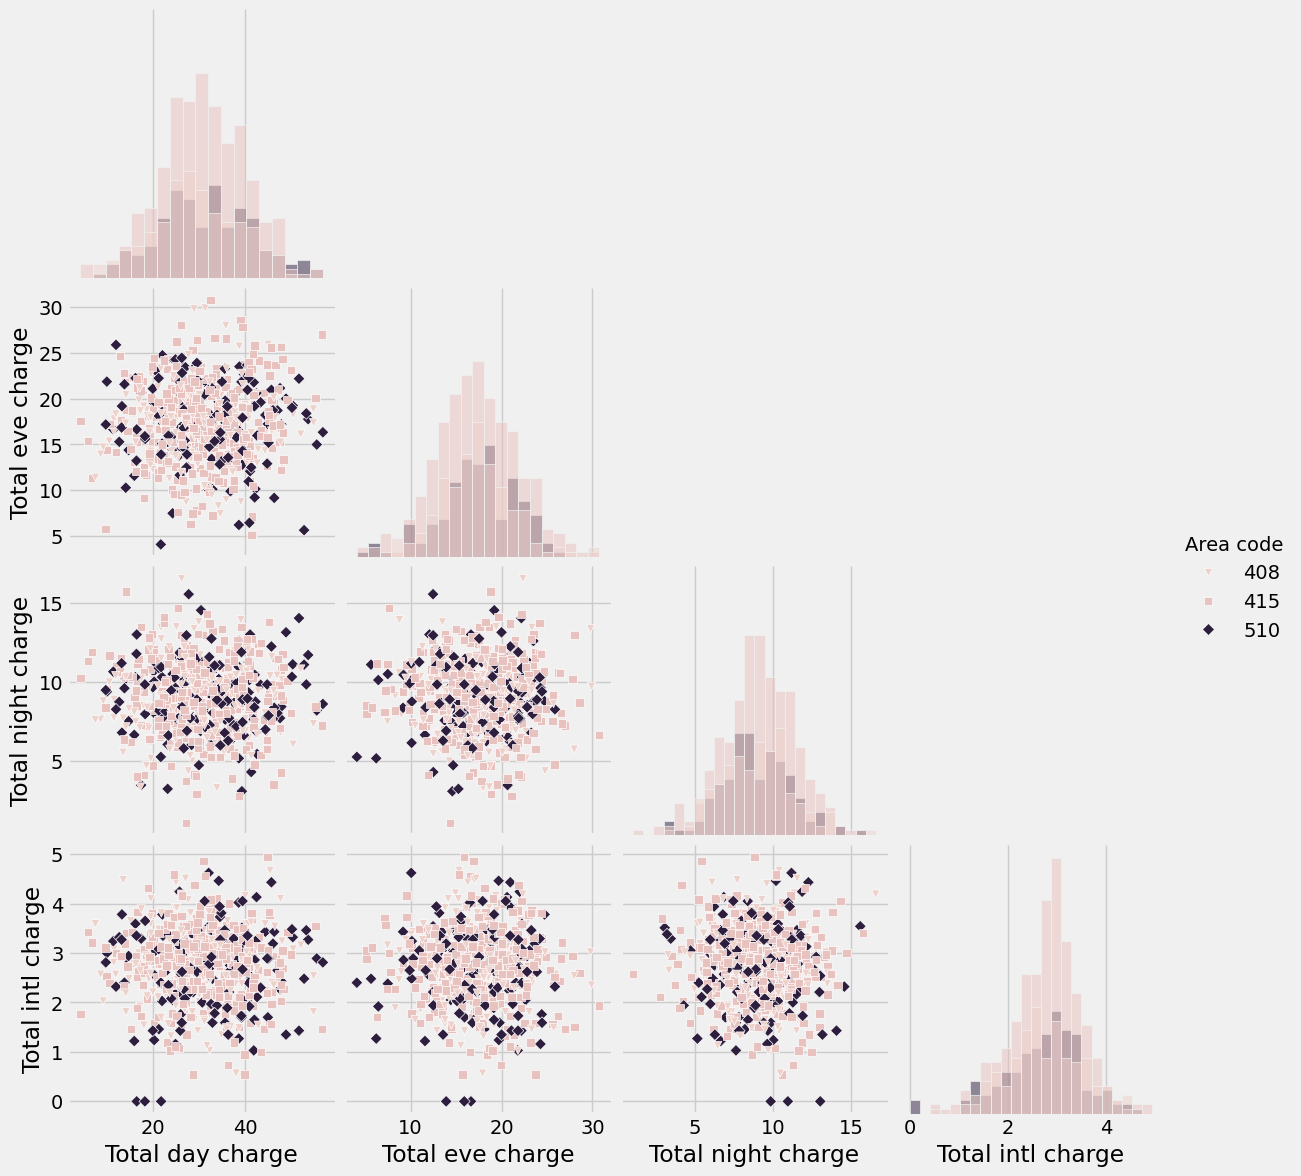

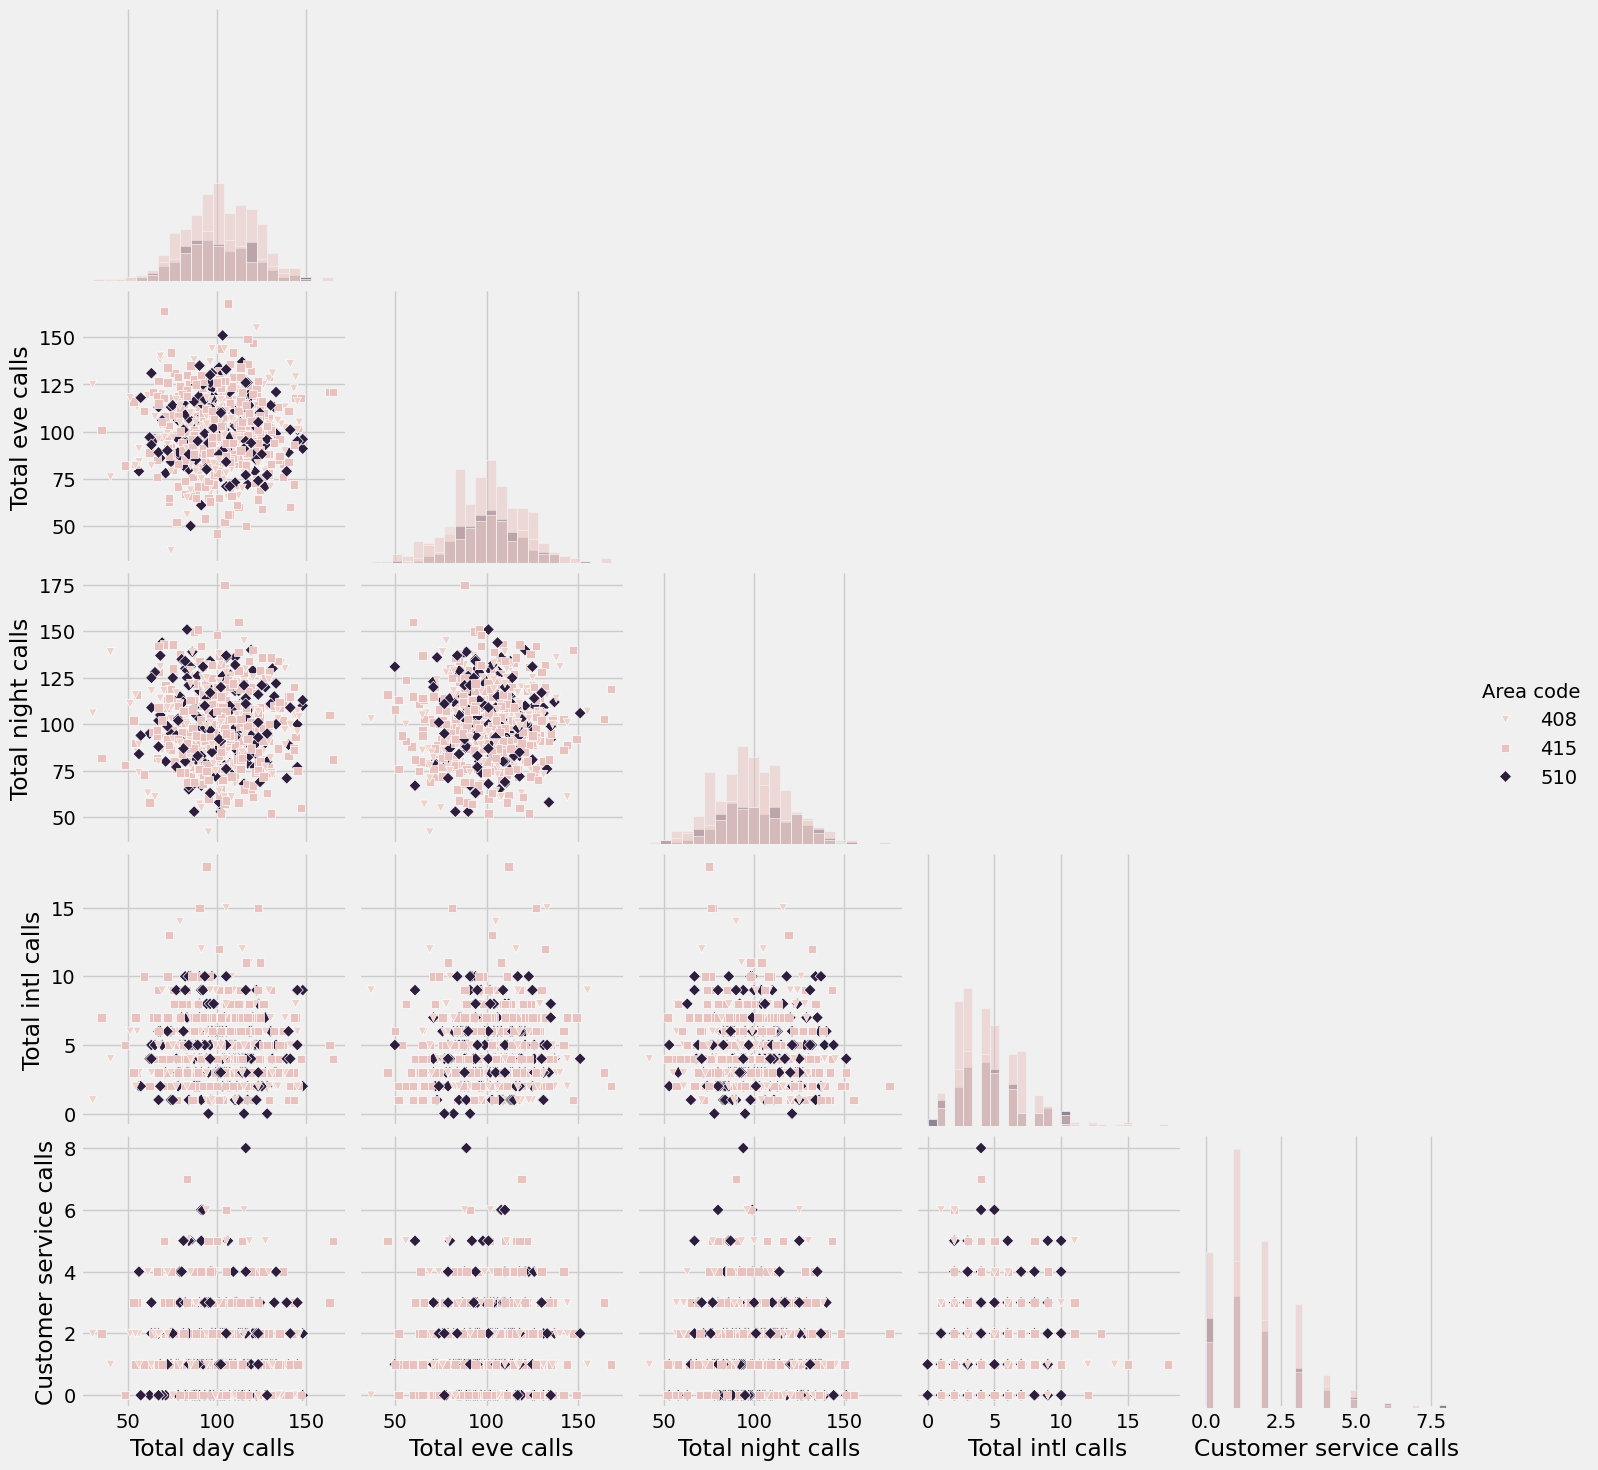

In [24]:
plt.figure()
total_minutes_cols = ["Area code"]
total_charge_cols = ["Area code"]
total_calls_cols = ["Area code"]
for col in all_feature_columns:
    if "minutes" in col:
        total_minutes_cols.append(col)
    elif "charge" in col:
        total_charge_cols.append(col)
    elif "calls" in col:
        total_calls_cols.append(col)
sns.pairplot(churn_dataset[total_minutes_cols], hue = "Area code", height=3, markers=["v", "s", "D"],  diag_kind="hist",corner=True)
sns.pairplot(churn_dataset[total_charge_cols], hue = "Area code", height=3, markers=["v", "s", "D"],  diag_kind="hist",corner=True)
sns.pairplot(churn_dataset[total_calls_cols], hue = "Area code", height=3, markers=["v", "s", "D"],  diag_kind="hist",corner=True)
plt.show()

<Figure size 640x480 with 0 Axes>

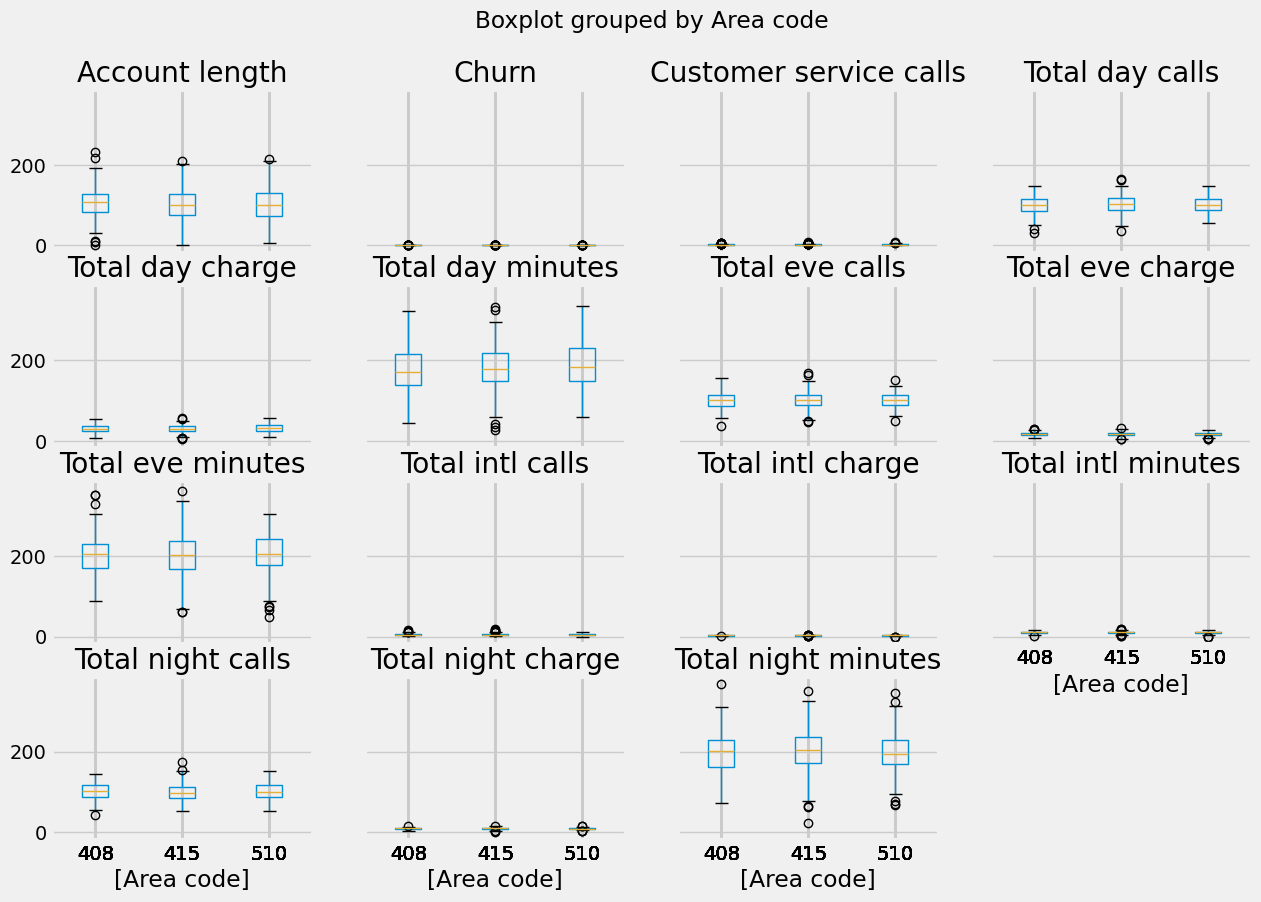

In [53]:
plt.figure()
churn_dataset.boxplot(by="Area code", figsize=(15, 10))
plt.show()

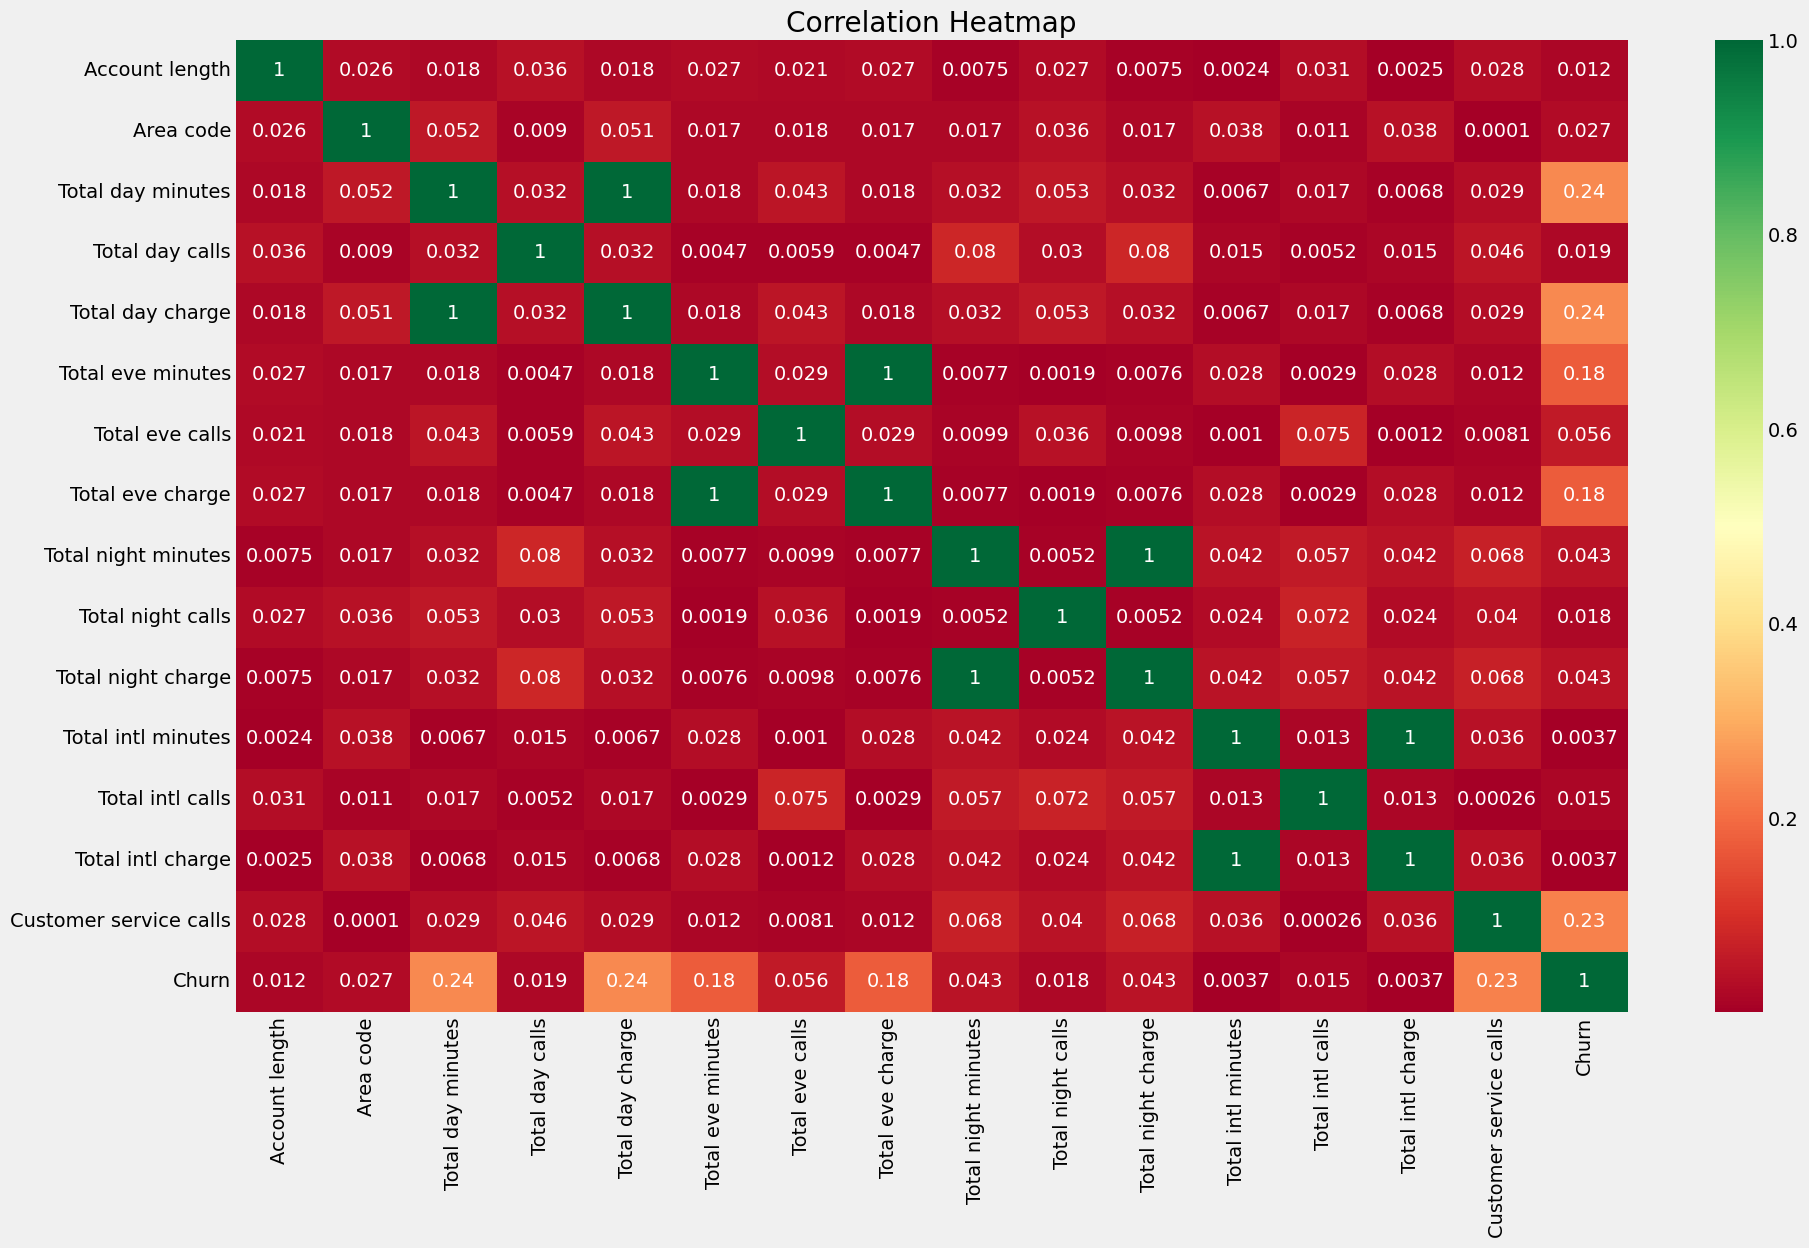

In [54]:
plt.figure(figsize=(20,12))
#draws heatmap with input as the correlation matrix calculted by(data.corr())
sns.heatmap(churn_dataset.corr().abs(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

In [25]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [26]:
confusion_matrix(y_test,y_pred)

array([[112,   3],
       [ 11,   8]])

In [27]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
False,112,3,115
True,11,8,19
All,123,11,134


In [28]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94       115
        True       0.73      0.42      0.53        19

    accuracy                           0.90       134
   macro avg       0.82      0.70      0.74       134
weighted avg       0.88      0.90      0.88       134



In [30]:

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of model using all features is ' + str(round(accuracy, 2)) + ' %.')

Accuracy of model using all features is 89.55 %.
